In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import csv
import seaborn as sns 
import operator

## Goal of Notebook:
- combine the weights of the skills gathered from indeed/workopolis and kaggle in order to quantify skills importance 
- Visuzalize the important skills using the indeed dataset

Combining the weights obtained from kaggle and indeed by grouping common skills

In [2]:
# remove soft skills from the indeed dataset, we want to examine only techinical skills
l_soft = ['project management', 'audit',  'verbal', 'assertiveness', 'communication',\
          'collaboration', 'leadership', 'innovative', 'interpersonal', 'consulting',\
          'creativity', 'critical thinkinh', 'customer service', 'decision making',\
          'documenting', 'facilitating meetings', 'guidance', 'logical thinking', \
          'mentoring', 'presentation', 'problem saving', 'report', 'writing', 'research', 'working independently', 'supervisory', 'sap']

In [3]:
# group techincal skills under general topics such as visualization, big data, etc. 
skills_type = {'acumendesign': 'visualization', 'python':'python', 'sql':'sql', 'excel':'excel', 'java':'java', 'c':'c', 'c+': 'c+', 'c++': 'c++', 'r': 'r', 'tableau': 'visaulization', 
               'spark':'big data', 'hadoop':'big data', 'm': 'sql', 'azure': 'cloud', 'tensorflow': 'framework', 'acumen': 'visualization','design': 'analytics',\
               'd3': 'visualization', 'cloud': 'cloud', 'data mining': 'big data', 'creating algorithms': 'ml','data manipulation': 'big data', \
               'data wrangling': 'big data', 'big data':'big data', 'api': 'cloud', 'apiengine':'cloud', 'aws': 'visualization', 'dplyr': 'sql', \
               'information retrieval':'big data', 'interpreting data':'big data', 'keras':'framework', 'mathematics': 'statistics', 'statistics':'statistics',\
               'matlab':'matlab', 'excel':'excel', 'predictive models':'ml', 'machine learning':'ml', 'recommendation engines':'analytics', \
               'reinforcement learning':'deep learning', 'risk modeling':'simulation', 'scripting languages':'ml', 'speech recognition':'deep learning',\
               'statistical learning models':'probability model', 'statistical modeling':'probability model', 'supervised':'ml',\
               'unsupervised':'ml', 'simulation':'simulation', 'tensorflow':'framework', 'time series':'time series', \
               'nlp':'deep learning', 'logistic':'ml', 'linear':'ml', 'optimization':'optimization', 'mathematical modelling':'probability model', \
               'matplotlib':'visualization', 'neural networks':'deep learning', 'nltk':'framework', 'numpy':'framework', 'pandas':'framework', \
               'random forests':'ensemble method', 'deep learning':'deep learning', 'seaborn':'visualization', 'sklearn':'framework', \
               'ensemble methods':'ensemble method', 'knn':'ml', 'naives bayes':'ml', 'svm':'ml',\
               'hypothesis testing':'statistics', 'decision trees':'ml', 'web scraping':'analytics', 'chatbots':'analytics',\
               'network analysis':'deep learning', 'bokeh':'visualization', 'cluster analysis':'ml', \
               'gradient boosting':'ensemble method', 'principle component analysis':'ml', 'build pipeline':'automated tools','feature engineering':'analytics', \
               'monte carlo':'simulation', 'hyperparameter tuning':'ml', 'model validation':'ml', 'ggplot':'visualization', 'plotly':'visualization',\
               'geoplotlib':'visualization', 'tableau':'visualization', 'model training':'ml', \
               'model testing':'ml', 'relational Database':'sql', 'pyspark':'big data', 'query tuning':'sql', 'error handling':'sql',\
               'recursive queries':'sql', 'postgresql':'sql', 'triggers':'sql', 'neural nets':'deep learning', 'tensors':'python', 'kafka':'big data', 'pivot tables':'excel', 'multivariable calculus':'statistics', \
               'nosql':'sql', 'scikit':'framework', 'scipy':'framework', 'xgboost':'ensemble method', 'validating analytics:':'analytics', 'Gradient Bossting Machines': 'ensemble method',\
               'Carcet': 'framework', 'Caret': 'framework', 'Bash': 'scripting', 'Keras': 'framework', 'SQL': 'sql', 'Automated Hypreparameter Tuning': 'automated tools', 'Dense NNs': 'deep learning',\
               'D3.js': 'visualization', 'Spark MLib': 'big data','MATLAB': 'matlab','CNN': 'deep learning', 'Automated Full ML Pipelines': 'automated tools',\
               'RNN': 'deep learning', 'Bokeh': 'visualization', 'Transoformed Network': 'deep learning', 'Bayesian Approaches': 'probability models','Fast.ai': 'deep learning',\
               'Geoplotlib': 'visualization', 'Automated Feature Engineering': 'automated tools','LightGBM': 'ensemble method','Python': 'python', 'Pytorch': 'framework',\
               'Scikit-learn': 'framework', 'Evolutionary Approaches': 'ml','Decision Trees and Random Forest': 'ml', 'Automated Model Architecture Searches': 'automated tools',\
               'Generative Adversarial Networks': 'deep learning', 'Automated Data Augmentation': 'automated tools', 'Tensorflow': 'framework', 'Shiny': 'framework',\
               'Leaflet/Folium': 'visualization', 'Xgboost': 'ensemble method', 'Plotly': 'visualization', 'Automated Model Selection': 'automated tools', 'Seaborn': 'visualization', 'Random Forest': 'ml',\
               'Linear Models': 'ml', 'C': 'c', 'ggplot': 'visualization', 'Java': 'java', 'Matplotlib': 'visualization', 'R': 'r', 'C++': 'c++', 'Javascript':'java'}

## Read in weighted skills data from indeed and kaggle

In [4]:
df_k = pd.read_csv("Salary_Skills_weight.csv", engine = 'python', encoding='utf-8', error_bad_lines=False)
df_w = pd.read_csv("skillsWeb.csv", engine = 'python', encoding='utf-8', error_bad_lines=False)

In [5]:
df_w_a = df_w.values.tolist()

In [6]:
#Dropping the soft skills
idx = 0
for l_pair in df_w_a:
  if l_pair[0] in l_soft:
    df_w_a.pop(idx)
  idx+=1

In [7]:
df = pd.DataFrame(df_w_a, columns=['Skill','Weight'])

In [8]:
#scaling the weights to one
values = df_k['Weight'].values.tolist()
max_val = max(values)
values = [value/max_val for value in values]
df_k['Weight'] = values

In [9]:
#scaling the weights to one
values = df['Weight'].values.tolist()
max_val = max(values)
values = [value/max_val for value in values]
df['Weight'] = values

In [10]:
#The webscraping data has more sample points
#Therefore we are scaling the webscraping weight by 4 in the final weights

values = df.values.tolist()
topics_w_wts = {}
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in skills_type.keys():
    if skills_type[name] not in topics_w_wts.keys():
      topics_w_wts[skills_type[name]] = 4*weight
    else:
      topics_w_wts[skills_type[name]] += 4*weight

In [11]:
#The kaggle dataset has lesser number sample points
#Therefore we are not scaling the kaggle weight down by two in the final weights

values = df_k.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in skills_type.keys():
    if skills_type[name] not in topics_w_wts.keys():
      topics_w_wts[skills_type[name]] = weight
    else:
      topics_w_wts[skills_type[name]] += weight

In [12]:
sorted_topics = sorted(topics_w_wts.items(), key=lambda x: x[1], reverse = True)    
sorted_topics

[('ml', 4.716088317783234),
 ('visualization', 3.8651108735854507),
 ('sql', 3.4084797966153904),
 ('excel', 3.2755382501145207),
 ('framework', 2.8443812782795836),
 ('deep learning', 2.7321066829541407),
 ('big data', 2.517407237746221),
 ('statistics', 2.4310581768208883),
 ('cloud', 1.9008245533669264),
 ('r', 1.864732659647914),
 ('python', 1.8187649187649186),
 ('ensemble method', 0.7834235800337496),
 ('optimization', 0.6209344938158498),
 ('probability models', 0.5680911680911681),
 ('java', 0.5423728813559322),
 ('automated tools', 0.5233115775488656),
 ('c', 0.4906092533211178),
 ('analytics', 0.2292716445258818),
 ('probability model', 0.18025652771415485),
 ('simulation', 0.1346770499312872),
 ('matlab', 0.11658268437929455),
 ('time series', 0.09070087036188733),
 ('c+', 0.0),
 ('c++', 0.0)]

<h2>Finding weight of all the visualization subtopics</h2>

In [13]:
#Checking what all topics are covered by visualization and finding their weights
list_visualization = []
for elem in skills_type:
  if skills_type[elem] == 'visualization':
    list_visualization.append(elem)
list_visualization

['acumendesign',
 'tableau',
 'acumen',
 'd3',
 'aws',
 'matplotlib',
 'seaborn',
 'bokeh',
 'ggplot',
 'plotly',
 'geoplotlib',
 'D3.js',
 'Bokeh',
 'Geoplotlib',
 'Leaflet/Folium',
 'Plotly',
 'Seaborn',
 'Matplotlib']

In [14]:

visualization_topics_w_wts = {}
visualization_topics = {'tableau': 'tableau', 'acumen': 'acumen', 'd3': 'd3', 'aws': 'aws', 'matplotlib': 'matplotlib',\
                        'seaborn': 'seaborn', 'bokeh': 'bokeh', 'ggplot': 'ggplot', 'plotly': 'plotly', 'geoplotlib': 'geoplotlib',\
                        'D3.js': 'd3', 'Bokeh': 'bokeh', 'Geoplotlib': 'geoplotlib', 'Leaflet/Folium': 'leaflet', 'Plotly': 'plotly',\
                        'Seaborn': 'seaborn', 'Matplotlib': 'matplotlib'}
values = df.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in visualization_topics.keys():
    if visualization_topics[name] not in visualization_topics_w_wts.keys():
      visualization_topics_w_wts[visualization_topics[name]] = 4*weight
    else:
      visualization_topics_w_wts[visualization_topics[name]] += 4*weight\

values = df_k.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in visualization_topics.keys():
    if visualization_topics[name] not in visualization_topics_w_wts.keys():
      visualization_topics_w_wts[visualization_topics[name]] = weight
    else:
      visualization_topics_w_wts[visualization_topics[name]] += weight

#Sorting different visualization techniques based on weights
sorted_vis_subtopics = sorted(visualization_topics_w_wts.items(), key=lambda x: x[1], reverse = True)    
sorted_vis_subtopics

[('tableau', 0.9917544663307376),
 ('plotly', 0.8289935306884458),
 ('seaborn', 0.6586953315766875),
 ('aws', 0.4940448923499771),
 ('ggplot', 0.46699163309332814),
 ('matplotlib', 0.40012346114041025),
 ('d3', 0.021530004580852042),
 ('bokeh', 0.002977553825011452),
 ('geoplotlib', 0.0)]

Let's now use the list of subtopics from above to visualize the number of jobs on indeed/workopolis require these skills

In [15]:
Final = pd.read_csv('Final_ResultsF.csv')
vis_topics = ['tableau', 'd3','aws','matplotlib','seaborn','bokeh','ggplot','plotly','geoplotlib']

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


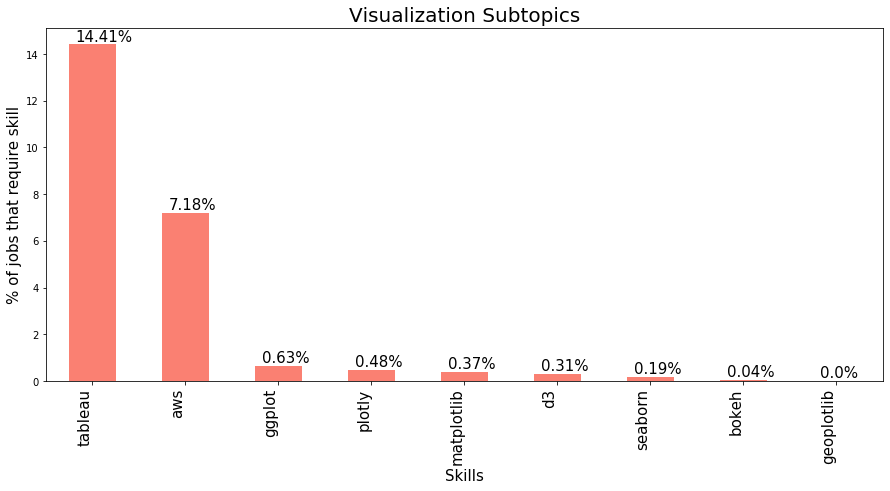

In [16]:
Viz = Final[vis_topics]
v = Viz.sum().values
Viz.loc[len(Viz)] = v/30052 *100  # extracted a total of 30052 jobs from indeed and workopolis

plt.figure(figsize=(15,6.5))
ax = Viz.iloc[-1,:].sort_values(ascending=False).plot.bar(color='salmon')
plt.xticks(rotation=90, ha='right', fontsize='15')
ax.set_xlabel('Skills', size=15)
ax.set_ylabel('% of jobs that require skill', size=15)
ax.set_title('Visualization Subtopics', size=20)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+'%', (p.get_x() +0.07, p.get_height() +0.15), fontsize=15)

<h2>Finding weight of all the framework subtopics</h2>

In [17]:
#Checking what all topics are covered by visualization and finding their weights
list_frameworks = []
for elem in skills_type:
  if skills_type[elem] == 'framework':
    list_frameworks.append(elem)
list_frameworks

['tensorflow',
 'keras',
 'nltk',
 'numpy',
 'pandas',
 'sklearn',
 'scikit',
 'scipy',
 'Carcet',
 'Caret',
 'Keras',
 'Pytorch',
 'Scikit-learn',
 'Tensorflow',
 'Shiny']

In [18]:
framework_topics_w_wts = {}
framework_topics = {'tensorflow': 'tensorflow', 'keras': 'tensorflow', 'nltk': 'nltk', \
                   'numpy': 'numpy', 'pandas': 'pandas', 'sklearn': 'sklearn',\
                   'scikit': 'scikit', 'scipy': 'scipy', 'Carcet': 'caret', 'Caret': 'caret', 'Keras': 'tensorflow',\
                   'Pytorch': 'pytorch', 'Scikit-learn': 'scikit', 'Tensorflow': 'tensorflow', 'Shiny': 'shiny'}

values = df.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in framework_topics.keys():
    if framework_topics[name] not in framework_topics_w_wts.keys():
      framework_topics_w_wts[framework_topics[name]] = 4*weight
    else:
      framework_topics_w_wts[framework_topics[name]] += 4*weight\

values = df_k.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in framework_topics.keys():
    if framework_topics[name] not in framework_topics_w_wts.keys():
      framework_topics_w_wts[framework_topics[name]] = weight
    else:
      framework_topics_w_wts[framework_topics[name]] += weight

#Sorting different frameworks available based on weights
sorted_fr_subtopics = sorted(framework_topics_w_wts.items(), key=lambda x: x[1], reverse = True)    
sorted_fr_subtopics

[('tensorflow', 1.4929537099028625),
 ('scikit', 0.5807777790828639),
 ('pytorch', 0.5159544159544159),
 ('pandas', 0.09413650939074668),
 ('numpy', 0.0874942739349519),
 ('scipy', 0.04557947778286762),
 ('nltk', 0.014200641319285388),
 ('sklearn', 0.013284470911589557)]

## Visualize framework subtopics using Indeed Data


/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


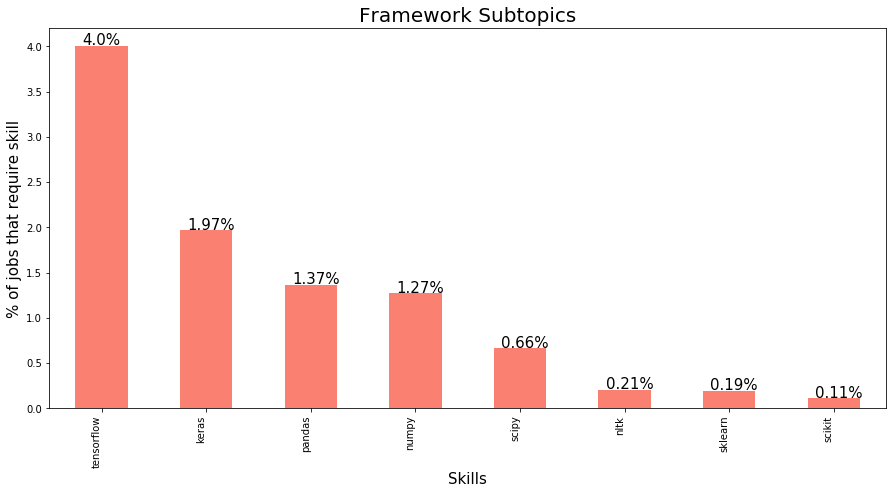

In [19]:
frame_topics = ['tensorflow','keras','nltk','numpy','pandas','sklearn','scikit','scipy']

frame = Final[frame_topics]
v = frame.sum().values
frame.loc[len(Viz)] = v/30052 *100 

plt.figure(figsize=(15,7))
ax = frame.iloc[-1,:].sort_values(ascending=False).plot.bar(color='salmon')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('Skills', size=15)
ax.set_ylabel('% of jobs that require skill', size=15)
ax.set_title('Framework Subtopics', size=20)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+'%', (p.get_x() +0.07, p.get_height() +0.01), fontsize=15)

<h2>Finding weight of all the ML subtopics

In [20]:
#Checking what all topics are covered by ML topics and finding their weights
list_ml = []
for elem in skills_type:
  if skills_type[elem] == 'ml':
    list_ml.append(elem)
list_ml

['creating algorithms',
 'predictive models',
 'machine learning',
 'scripting languages',
 'supervised',
 'unsupervised',
 'logistic',
 'linear',
 'knn',
 'naives bayes',
 'svm',
 'decision trees',
 'cluster analysis',
 'principle component analysis',
 'hyperparameter tuning',
 'model validation',
 'model training',
 'model testing',
 'Evolutionary Approaches',
 'Decision Trees and Random Forest',
 'Random Forest',
 'Linear Models']

In [21]:
ml_topics_w_wts = {}
ml_topics = {'creating algorithms': 'algorithm', 'predictive models': 'probability models', 'machine learning': 'ML', 'scripting languages': 'scripting', \
             'supervised': 'supervised', 'unsupervised': 'unsupervised', 'logistic': 'Linear Models',\
             'linear': 'Linear Models', 'knn': 'ML', 'naives bayes': 'probability models', 'svm': 'ML', 'decision trees': 'Decision Tree', 'cluster analysis': 'ML',\
             'principle component analysis': 'ML', 'hyperparameter tuning': 'ML', 'model validation': 'ML',\
             'model training': 'ML', 'model testing': 'ML', 'Evolutionary Approaches': 'Evolutionary', \
             'Decision Trees and Random Forest': 'Decision Tree', 'Random Forest': 'Decision Tree', 'Linear Models': 'Linear Models'}

values = df.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in ml_topics.keys():
    if ml_topics[name] not in ml_topics_w_wts.keys():
      ml_topics_w_wts[ml_topics[name]] = 4*weight
    else:
      ml_topics_w_wts[ml_topics[name]] += 4*weight\

values = df_k.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in ml_topics.keys():
    if ml_topics[name] not in ml_topics_w_wts.keys():
      ml_topics_w_wts[ml_topics[name]] = weight
    else:
      ml_topics_w_wts[ml_topics[name]] += weight

#Sorting different ML sub-topics based on weights
sorted_fr_subtopics = sorted(ml_topics_w_wts.items(), key=lambda x: x[1], reverse = True)    
sorted_fr_subtopics

[('Decision Tree', 1.810667903888243),
 ('ML', 1.4319743472285846),
 ('Linear Models', 0.9260342480681463),
 ('scripting', 0.2395785616124599),
 ('probability models', 0.19491525423728814),
 ('supervised', 0.059780119102153),
 ('unsupervised', 0.05245075584058635),
 ('algorithm', 0.0006871278057718735)]

## Visualize machine learning subtopics using Indeed Data

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


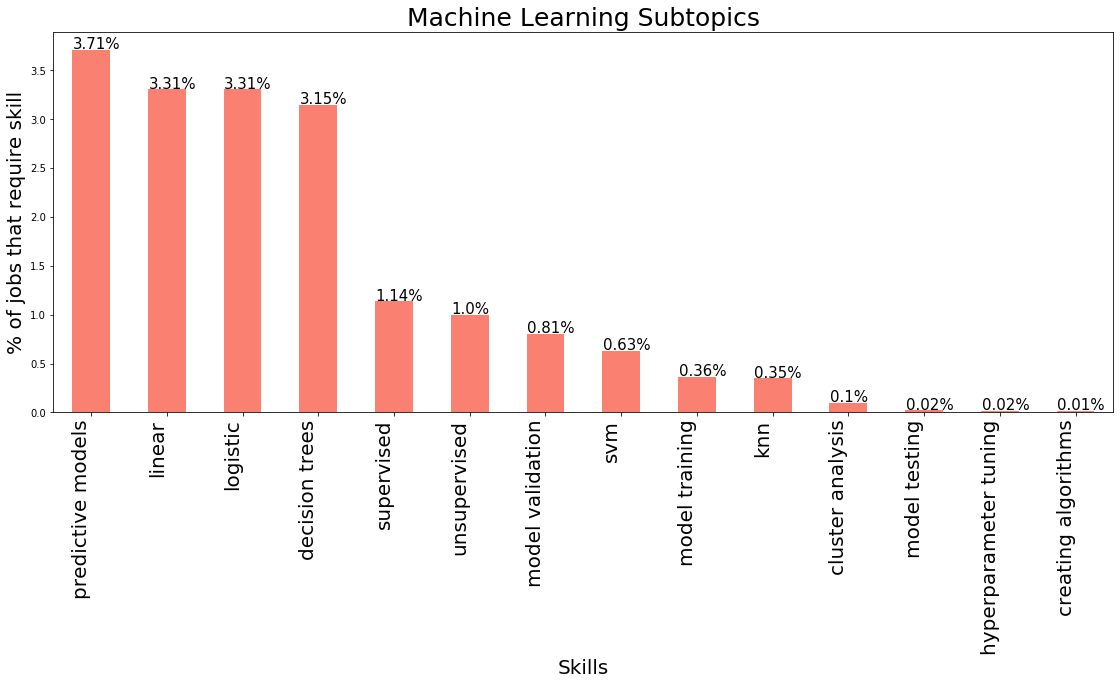

In [22]:
ml = ['creating algorithms', 'predictive models','supervised','unsupervised',\
      'logistic','linear','knn','svm','decision trees','cluster analysis','hyperparameter tuning',\
      'model validation','model training','model testing']

# topics such as 'principle component analysis' and 'naives bayes' were not graphed because the data from indeed didn't value them (i.e. very small percentage)      
ml_ = Final[ml]
v = ml_.sum().values
ml_.loc[len(ml_)] = v/22949 *100 

plt.figure(figsize=(19,7))
ax = ml_.iloc[-1,:].sort_values(ascending=False).plot.bar(color='salmon')
plt.xticks(rotation=90, ha='right', fontsize=20)
ax.set_xlabel('Skills', size=20)
ax.set_ylabel('% of jobs that require skill', size=20)
ax.set_title('Machine Learning Subtopics', size=25)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+'%', (p.get_x() +0.01, p.get_height() +0.01), fontsize=15)

<h2>Finding weight of all the Deep Learning subtopics</h2>

In [23]:
#Checking what all topics are covered by ML topics and finding their weights
list_dl = []
for elem in skills_type:
  if skills_type[elem] == 'deep learning':
    list_dl.append(elem)
list_dl

['reinforcement learning',
 'speech recognition',
 'nlp',
 'neural networks',
 'deep learning',
 'network analysis',
 'neural nets',
 'Dense NNs',
 'CNN',
 'RNN',
 'Transoformed Network',
 'Fast.ai',
 'Generative Adversarial Networks']

In [24]:
dl_topics_w_wts = {}
dl_topics = {'reinforcement learning': 'RL', 'neural networks': 'NN', 'deep learning': 'DL',\
             'network analysis': 'Research AI', 'neural nets': 'NN', 'Dense NNs': 'NN',\
             'CNN': 'CNN', 'RNN': 'RNN', 'Transoformed Network': 'Research AI', 'Fast.ai': 'Research AI',\
            'Generative Adversarial Networks': 'GAN', 'nlp': 'NLP', 'speech recognition': 'NLP'}

values = df.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in dl_topics.keys():
    if dl_topics[name] not in dl_topics_w_wts.keys():
      dl_topics_w_wts[dl_topics[name]] = 4*weight
    else:
      dl_topics_w_wts[dl_topics[name]] += 4*weight\

values = df_k.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in dl_topics.keys():
    if dl_topics[name] not in dl_topics_w_wts.keys():
      dl_topics_w_wts[dl_topics[name]] = weight
    else:
      dl_topics_w_wts[dl_topics[name]] += weight

#Sorting different DL sub-topics based on weights
sorted_fr_subtopics = sorted(dl_topics_w_wts.items(), key=lambda x: x[1], reverse = True)    
sorted_fr_subtopics

[('NN', 0.7759434793333099),
 ('CNN', 0.6378917378917379),
 ('RNN', 0.6245014245014244),
 ('DL', 0.38181401740723775),
 ('NLP', 0.23728813559322032),
 ('RL', 0.04145671094823637),
 ('Research AI', 0.03321117727897389)]

## Visualize Deep Learning Subtopics using Indeed data

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


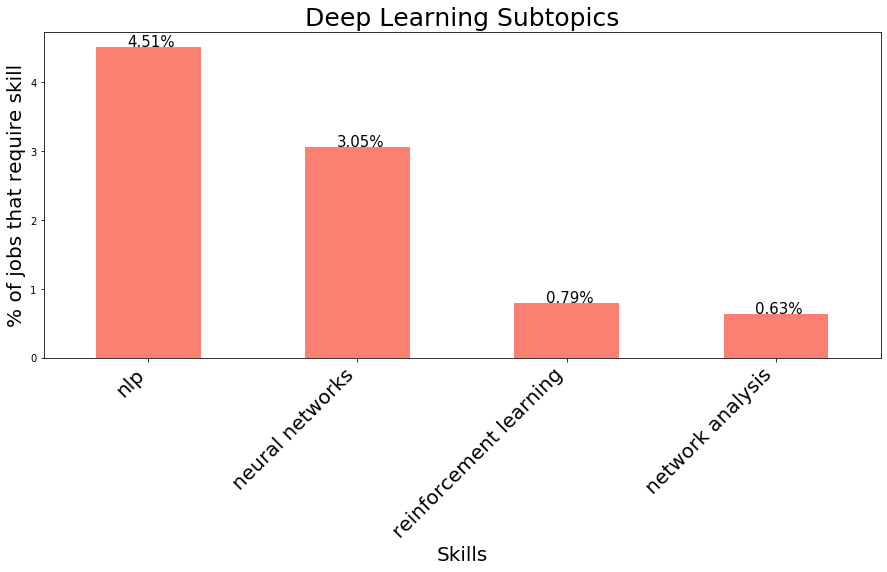

In [25]:
Deep = ['reinforcement learning','neural networks','network analysis', 'neural nets', 'nlp', 'speech recognition']


dl = Final[Deep]
# combine neural networks and neural nets as they are the same thing
dl['neural networks'] = dl['neural networks']+ dl['neural nets']
#combine nlp and speech recognition as they go under the same category
dl['nlp'] = dl['nlp']+ dl['speech recognition']

dl = dl[['reinforcement learning','neural networks','network analysis', 'nlp']]
v = dl.sum().values
dl.loc[len(dl)] = v/22949 *100 

plt.figure(figsize=(15,6))
ax = dl.iloc[-1,:].sort_values(ascending=False).plot.bar(color='salmon')
plt.xticks(rotation=45, ha='right', fontsize=20)
ax.set_xlabel('Skills', size=20)
ax.set_ylabel('% of jobs that require skill', size=20)
ax.set_title('Deep Learning Subtopics', size=25)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+'%', (p.get_x() +0.15, p.get_height() +0.01), fontsize=15)

<h2>Finding weight of all the Big Data subtopics</h2>

In [26]:
#Checking what all topics are covered by Cig Data topics and finding their weights
list_bd = []
for elem in skills_type:
  if skills_type[elem] == 'big data':
    list_bd.append(elem)
list_bd

['spark',
 'hadoop',
 'data mining',
 'data manipulation',
 'data wrangling',
 'big data',
 'information retrieval',
 'interpreting data',
 'pyspark',
 'kafka',
 'Spark MLib']

In [27]:
bd_topics_w_wts = {}
bd_topics = {'spark': 'spark', 'hadoop': 'hadoop','data mining': 'mining', 'data manipulation': 'big data analytics', 'data wrangling': 'big data analytics', 'big data': 'big data analytics', \
             'information retrieval': 'big data analytics', 'interpreting data': 'big data analytics', 'Spark MLib': 'spark'}

values = df.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in bd_topics.keys():
    if bd_topics[name] not in bd_topics_w_wts.keys():
      bd_topics_w_wts[bd_topics[name]] = 4*weight
    else:
      bd_topics_w_wts[bd_topics[name]] += 4*weight\

values = df_k.values.tolist()
for pair in values:
  name, weight  = pair[0], pair[1]
  if name in bd_topics.keys():
    if bd_topics[name] not in bd_topics_w_wts.keys():
      bd_topics_w_wts[bd_topics[name]] = weight
    else:
      bd_topics_w_wts[bd_topics[name]] += weight

#Sorting different DL sub-topics based on weights
sorted_fr_subtopics = sorted(bd_topics_w_wts.items(), key=lambda x: x[1], reverse = True)    
sorted_fr_subtopics

[('big data analytics', 0.7746220797068255),
 ('spark', 0.6007787448465414),
 ('mining', 0.5180943655519926),
 ('hadoop', 0.445487860742098)]

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


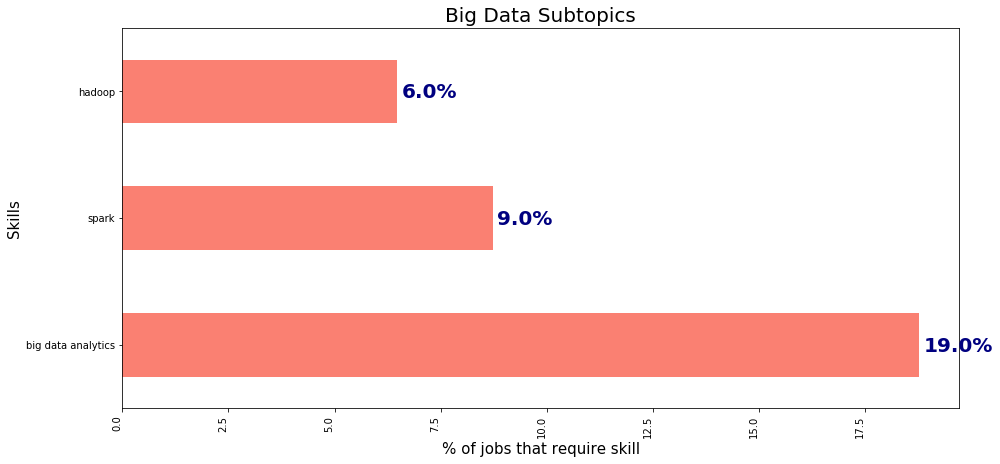

In [28]:
big = ['spark', 'hadoop','data mining','data manipulation','data wrangling','big data','information retrieval','interpreting data',\
       'pyspark']

# combine data analysis columns into big data analytics
big_D = Final[big]
big_D['big data analytics'] = big_D['data mining'] + big_D['data manipulation'] + big_D['data wrangling'] + big_D['big data'] + big_D['information retrieval'] + big_D['interpreting data']

big_D = big_D[['spark', 'hadoop','big data analytics']]
v = big_D.sum().values
big_D.loc[len(big_D)] = v/30052 *100 

plt.figure(figsize=(15,7))
ax = big_D.iloc[-1,:].sort_values(ascending=False).plot.barh(color='salmon')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('% of jobs that require skill', size=15)
ax.set_ylabel('Skills', size=15)
ax.set_title('Big Data Subtopics', size=20)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.20, \
            str(round((i.get_width())))+'%', fontsize=20, color='navy', weight='bold')
    
ax.tick_params(axis="x", labelsize=10, color='black')
ax.tick_params(axis="y", labelsize=10)

#from google.colab import files
#plt.savefig("big.png")
#files.download("big.png")

In [29]:
# Discussion

Based on the visualization from above the following things stand out:
- Tableau is the top-rated skill; 14% of employeers find it desirable. Being introducted to this software in MIE 1624 might be helpful. 
- TensorFlow and Keras is the most popular framework (it is already briefly covered in this course)
- Linear and Logistic Models are still relevant in the current job market and thus it's important to not change assignment 1 (which revolved around logisitc classification)
- Natural Language processing is the most important deep learning techinque (so don't change assignment 2)
- Neural Networks are almost as important as NLP and thus instead of having an exam we can add a third assignment that involves implementing nets. 
- Big data is a highly touted topic and skills such as data manipulation, data wrangling and information retrieval are valuable. 
- spark and hadoop are the most popular programs associated with big data
- Finding a way to incorporate spark and hadoop into the program can be difficult since they are different from the primary language used in this course, python. Thus big data should only be covered at the end of the course if time permits. 

This notebook allowed us to weight the most important general topics (such as machine learning and deep learning) and then visualizae their subtopics (i.e. skills). Using the skills, the appriorate changes were made to MIE1624. 

<h2>Visualization of common words in job postind and extracted required skills for job</h2>

In [30]:
import pandas as pd
try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud
  from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
Final = pd.read_csv('Final_ResultsF.csv')
Final.head()

,Unnamed: 0,city,job,location,salary,link,Cleaned_summary,python,sql,excel,...,conditional formating,multivariable calculus,nosql,scikit,scipy,xgboost,validating analytics,job_type,Experience,Contract_Type
0,0,Los+Angeles,Machine Learning Engineer,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,triplebytetriplebyte transforming way software...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,engineering,None,None
1,1,Los+Angeles,Data Scientist,"Los Angeles, CA 90079",None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position advance2 fastgrowing marketing optimi...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,engineering,3,None
2,2,Los+Angeles,Data Scientist Director (Northeast),United States,None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,company description clearlink partners indust...,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,engineering,3,full-time
3,3,Los+Angeles,Data Scientist,"Los Angeles, CA 90024","$110,000 - $150,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,data scientist data scientistmachine learning ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,engineering,2,full-time
4,4,Los+Angeles,Data Scientist,"Los Angeles, CA",None,https://www.indeed.com/rc/clk?jk=18552fae85097...,mutesix mutesix iprospect company awardwinn...,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,engineering,2,None


In [32]:
req = pd.read_csv('Job_requirements_Final_ResultF.csv')
req.head()

,ID,requirements
0,0,ml
1,1,"python,sql,r,big data,statistics,statistics"
2,2,"python,sql,r,big data,big data,statistics,stat..."
3,3,"python,sql,r,visualization,big data,statistics..."
4,4,"python,sql"


In [33]:
#Extracting words in a list of tweets
def words_in_summary(summary):
    word_list = []
    templist = []
    for sum_ in range(len(summary)):
        templist = summary[sum_].split(' ')
        for word in templist:
            word_list.append(word)
    return word_list

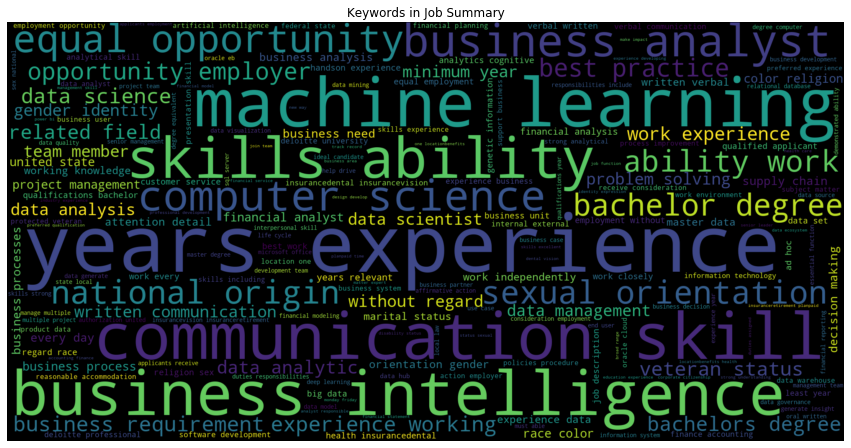

In [34]:
#Checking highly occuring words in each type of sentiment 
sum_wordlist = words_in_summary(Final['Cleaned_summary'].values.tolist())
#Joining the list
sum_words = ' '.join(sum_wordlist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(sum_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords in Job Summary')
plt.axis("off")
plt.show()

In [35]:
req_w_na = req.dropna()

In [36]:
#Extracting words in a list of tweets
def words_in_req(requirement):
    word_list = []
    templist = []
    for req in range(len(requirement)):
        templist = requirement[req].split(',')
        for word in templist:
            word_list.append(word)
    return word_list

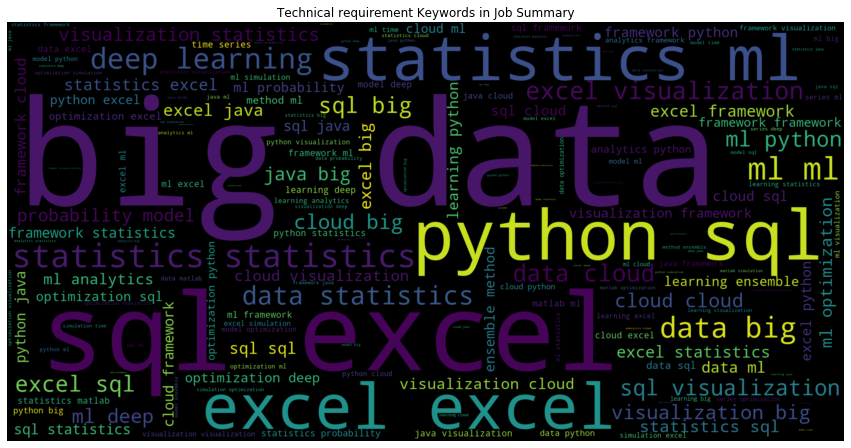

In [37]:
#Technical Keyword found in by using keywords list for all the jobs in the job market
#Checking highly occuring words in each type of sentiment 
req_wordlist = words_in_summary(req_w_na['requirements'].values.tolist())
#Joining the list
req_words = ' '.join(req_wordlist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(req_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Technical requirement Keywords in Job Summary')
plt.axis("off")
plt.show()